practice sympy

In [1]:
import sympy
sympy.init_printing(use_latex='mathjax')

In [2]:
x, y = sympy.symbols('x y')
f = x*y*sympy.exp(x**2 + y**2)
f

      2    2
     x  + y 
x⋅y⋅ℯ       

In [3]:
sympy.integrate(f, x)

    2    2
   x  + y 
y⋅ℯ       
──────────
    2     

In [4]:
a = sympy.integrate(f, x, y)
a

  2    2
 x  + y 
ℯ       
────────
   4    

In [5]:
sympy.diff(a, x)

    2    2
   x  + y 
x⋅ℯ       
──────────
    2     

In [6]:
sympy.diff(a, x, y) # multiple partial difference

      2    2
     x  + y 
x⋅y⋅ℯ       

In [7]:
sympy.integrate(f, x, y, x)

    ⎛ 2⎞        
    ⎝y ⎠        
√π⋅ℯ    ⋅erfi(x)
────────────────
       8        

In [8]:
sympy.integrate(f, x, y, x, x, x) # multiple partial integrate

   ⎛                ⎛ 2⎞          ⎞      
   ⎜ 2              ⎝x ⎠          ⎟  ⎛ 2⎞
   ⎜x ⋅erfi(x)   x⋅ℯ       erfi(x)⎟  ⎝y ⎠
√π⋅⎜────────── - ─────── - ───────⎟⋅ℯ    
   ⎝    2          2⋅√π       4   ⎠      
─────────────────────────────────────────
                    8                    

In [9]:
sympy.simplify(sympy.integrate(f, x, y, x, x, x))

 ⎛     ⎛ 2⎞                        ⎞  ⎛ 2⎞ 
 ⎜     ⎝x ⎠      ⎛   2    ⎞        ⎟  ⎝y ⎠ 
-⎝2⋅x⋅ℯ     - √π⋅⎝2⋅x  - 1⎠⋅erfi(x)⎠⋅ℯ     
───────────────────────────────────────────
                     32                    

---

In [10]:
a

  2    2
 x  + y 
ℯ       
────────
   4    

In [11]:
a.subs(x, 2) - a.subs(x, 0)

   ⎛ 2⎞     2    
   ⎝y ⎠    y  + 4
  ℯ       ℯ      
- ───── + ───────
    4        4   

In [12]:
(a.subs(x, 2) - a.subs(x, 0)).evalf()

        ⎛ 2⎞          2    
        ⎝y ⎠         y  + 4
- 0.25⋅ℯ     + 0.25⋅ℯ      

In [13]:
f = x**3 - 3*x**2 + x + 6
F = sympy.integrate(f)
F

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [14]:
F.subs(x, 2) - F.subs(x, 0)

10

In [15]:
(F.subs(x, 2) - F.subs(x, 0)).evalf()  # indifinite intigrate

10.0000000000000

In [16]:
from sympy import Matrix

In [17]:
x1, x2 = sympy.symbols('x1 x2')
X = Matrix([sympy.log(x1-1), x2**3])
X2 = Matrix([2*x1**2, sympy.exp(x2-1)])
Y = Matrix([[x1], [x2]])
X.jacobian(Y) # jacobian matrix: differentiate vector by vector

⎡  1          ⎤
⎢──────    0  ⎥
⎢x₁ - 1       ⎥
⎢             ⎥
⎢            2⎥
⎣  0     3⋅x₂ ⎦

numerical integration

In [18]:
def f(x, y):
    return np.exp(-x*y) / y**2

print(sp.integrate.dblquad(f, 1, np.inf, lambda x:0, lambda x: np.inf))
sp.integrate.nquad(f, [[0, np.inf], [1, np.inf]])

(0.4999999999999961, 1.0684538743333441e-08)


(0.4999999999999961, 1.0684538743333441e-08)


----

## Optimization by SciPy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [19]:
import scipy as sp

SciPy의 optimize 서브 패키지는 최적화 명령 minimize 제공
- (default algorithm = BFGS)

-  x : 최적화 해
- success : 최적화 성공시 True 반환 
- status : 종료상태, 최적화 성공시 0 반환
- message: 메세지 문자열

>- fun : x 위치 함수값
- jac : x 위치 자코비안(그레디언트) 벡터의 값
- hess : x 위치 헤시안 행렬 값


>>- nfev : 목적함수 호출 횟수
- njev : 자코비안 계산 횟수
- nhev : 헤시안 계산 회수
- nit : x 이동 횟수

In [20]:
def f1(x):
    return (x - 2) ** 2 + 2

In [21]:
x0 = 0 # 초기값 설정
result = sp.optimize.minimize(f1, x0) # 최적화할 함수, 초기값 입력
print(result)
x0 = result['x'] # 최적화 해
x0

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


array([ 1.99999999])

nit(x 이동횟수)는 두번이지만 nfev(함수호출 횟수)가 9이다.

이유는 **그레디언트 계산에 필요한 1차 미분(그레디언트 벡터) 함수나 헤시안 함수가 주어지지 않았기 때문**이다.

따라서 x값 위치 근처에서 gradient계산을 여러번 (1번당 앞뒤 1번씩 3번, 즉 3 x 3 = 9) 하게 된다.

이를 방지하기 위해서(계산량을 줄이기위해서)는 **직접 그레디언트와 헤시안 값을 반환하는 함수를 만들어 jac, hess 인수로 입력**하면 된다.




In [22]:
def f1d(x): # derivative of f1(x)
    return 2 * (x - 2.0) 

In [23]:
x0 = 0
sp.optimize.minimize(f1, x0, jac=f1d) 

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.])

#### 똑같이 nit은 2지만, nfev 숫자가 3으로 줄은 것을 확인할 수 있다.

---

다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 한다.

In [96]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [107]:
x0 = 0
result = sp.optimize.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 1.9756022361030668e-11
 hess_inv: array([[ 0.50913289,  1.01823656],
       [ 1.01823656,  2.04141475]])
      jac: array([  1.02142751e-07,  -1.74410930e-08])
  message: 'Optimization terminated successfully.'
     nfev: 288
      nit: 56
     njev: 72
   status: 0
  success: True
        x: array([ 0.99999556,  0.9999911 ])


array([ 0.99999556,  0.9999911 ])

### practice 
- 그레디언트 벡터 함수를 구현하여 jac 인수를 주는 방법으로 계산 속도를 향상시킨다.

sympy를 통해 그레디언트 함수계산

In [99]:
import sympy
from sympy import Matrix
sympy.init_printing(use_latex='mathjax')

In [100]:
x1, x2 = sympy.symbols('x1 x2')
f = Matrix([(-x1+1)**2 + 100 * (-x1**2 + x2)**2])
X = Matrix([[x1], [x2]])
f.jacobian(X)

⎡         ⎛    2     ⎞                     2         ⎤
⎣- 400⋅x₁⋅⎝- x₁  + x₂⎠ + 2⋅x₁ - 2  - 200⋅x₁  + 200⋅x₂⎦

In [101]:
def f_x(x):
    return np.array([-400*x[0] * (-x[0]**2 + x[1]) + 2*x[1] - 2, -200*x[0]**2 + 200* x[1]])

In [109]:
x0 = 0
result = sp.optimize.minimize(f2, (-2, -2), jac=f_x)
print(result)
x0 = result['x']
x0

      fun: 22.43362850527245
 hess_inv: array([[ 0.00076956, -0.00468878],
       [-0.00468878,  0.03196848]])
      jac: array([ 39.93745018,   1.87538769])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 113
      nit: 3
     njev: 101
   status: 2
  success: False
        x: array([ -3.73548686,  13.96323902])


array([ -3.73548686,  13.96323902])

- jac 인수를 입력했으나 최적점을 찾는데 실패했다. 
- nit 이 3인걸로 보아 계곡에 빠진 것 같아 시작점을 바꾸었다.

In [110]:
x0 = 0
result = sp.optimize.minimize(f2, (2, 2), jac=f_x)
print(result)
x0 = result['x']
x0

      fun: 5.061078380382515e-16
 hess_inv: array([[ 0.24979124,  0.49708793],
       [ 0.49708793,  0.99423267]])
      jac: array([ -8.94261120e-07,   4.49906054e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 32
     njev: 36
   status: 0
  success: True
        x: array([ 1.,  1.])


array([ 1.,  1.])

- 최적점을 찾았고 목표했던 nfev수도 줄였다.

---

## 2차 도함수를 사용한 방법 

minimize명령에서 스텝 사이즈를 인수로 받지 않는 이유는 디폴트 알고리즘인 BFGS에서는 2차 도함수인 헤시안 행렬 정보 등을 이용하여 스텝 사이즈를 스스로 추정하기 때문이다. 

이렇게 1차, 2차 도함수 정보를 이용하면 스텝 사이즈 뿐 아니라 그레디언트의 방향도 보다 최저점에 가까운 곳으로 변형하여 최적화 속도를 향상시킬 수 있다.

그래서 간단한 최적화 문제에서는 보통 SGD 알고리즘이 아닌 다음과 같이 1차 혹은 2차 도함수 정보까지 사용하는 최적화 알고리즘을 사용한다.

 - CG (conjugated gradient) 방법
 - BFGS ( Broyden-Fletcher-Goldfarb-Shanno) 방법
 
SciPy의 minimize 함수에서 `method='CG'` 또는 `method='BFGS'` 인수를 사용할 수 있다. (장점: 빠르고 안정적)

In [111]:
def f3obj(x):
    return x[0] **2 + 1.5 * x[1] ** 2

In [134]:
result1 = sp.optimize.minimize(f3obj, (4, 1.6), method='CG', options={'maxiter':1})
x_cg_1 = result1['x']
x_cg_1

array([ 0.46753248, -0.51948049])

In [137]:
result1 = sp.optimize.minimize(f3obj, (4, 1.6), method='CG', options={'maxiter':2})
x_cg_2 = result1['x']
x_cg_2

array([  3.02235675e-08,   1.86777108e-08])

In [132]:
%matplotlib inline

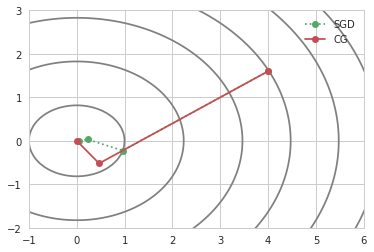

In [133]:
def f3(x1, x2):
    return f3obj(np.array([x1, x2]))

def f3g(x1, x2):
    return np.array([2 * x1, 3 * x2])

xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f3(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[1, 5, 12, 20, 30, 40])

# SGD

# step size
mu = 0.38

# k = 0
x0 = 4
y0 = 1.6
g0 = f3g(x0, y0)

# k = 1
x1 = x0 - mu * g0[0]
y1 = y0 - mu * g0[1]
g1 = f3g(x1, y1)

# k = 2
x2 = x1 - mu * g1[0]
y2 = y1 - mu * g1[1]
g2 = f3g(x2, y2)

# k = 3
x3 = x2 - mu * g2[0]
y3 = y2 - mu * g2[1]

plt.plot([x0, x1, x2, x3], [y0, y1, y2, y3], 'go:', label="SGD")
plt.plot([x0, x_cg_1[0], x_cg_2[0]], [y0, x_cg_1[1], x_cg_2[1]], 'ro-', label="CG")

plt.xlim(-1, 6)
plt.ylim(-2, 3)
plt.xticks(np.linspace(-1, 6, 8))
plt.yticks(np.linspace(-2, 3, 6))
plt.legend()
plt.show()

SGD가 여기저기 돌아다니며 최적점을 찾는 동안, 2큐에 최적점을 찾아버리는 CG님의 모습이다.

---

## 전역 최적화 문제

목표 함수가 local minima를 가지고 있는 경우 수치적 최적화 방법으로 global minimum에 도달한다는 보장이 없다. 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존한다. 전역 최적화 문제는 차후에 다룬다.

      fun: 8.315585579478032
 hess_inv: array([[ 0.118692]])
      jac: array([  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 3.83746748])


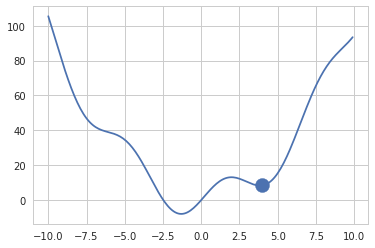

In [146]:
def f_global(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
result = sp.optimize.minimize(f_global, 4)
print(result)
plt.plot(x, f_global(x))
plt.scatter(x0, f_global(x0), s=200);

### Convex 문제

목적 함수의 2차 도함수 값이 항상 0이 되는 영역에서만 정의된 최적화 문제를 convex 문제라고 한다. 
$$ \dfrac{\partial^2f}{\partial x^2} \geq 0$$

convex 문제에서는 유일한 전역 최저점이 존재하며, 기울기가 0이 되는 것이 전역 최저점을 구하기 위한 필요충분조건이 된다. (항상 전역 최저점을 구할 수 있다.)

---